# Keras API Project

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### The Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv', index_col = 'LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# might be needed depending on your version of Jupyter
%matplotlib inline

In [7]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


<AxesSubplot:xlabel='loan_status', ylabel='count'>

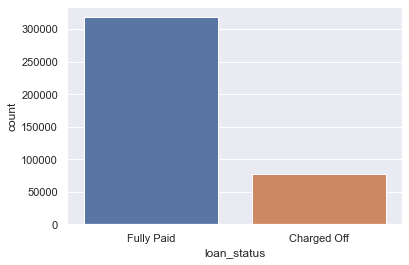

In [9]:
sns.countplot(x = 'loan_status', data = df)

# label heavily in favour of 'Fully Paid'

<AxesSubplot:>

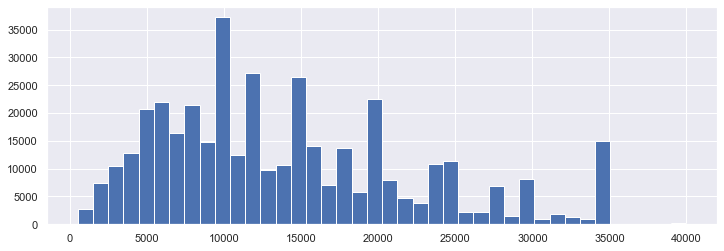

In [10]:
plt.figure(figsize = (12,4))
df['loan_amnt'].hist(bins = 40)

In [11]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

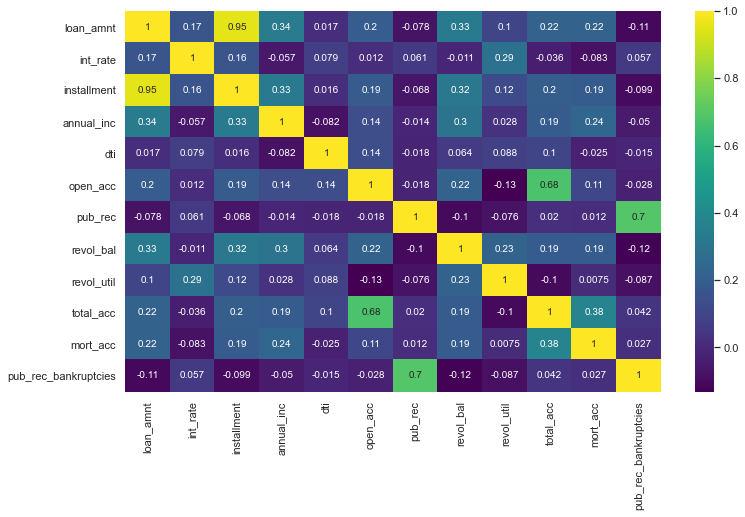

In [12]:
plt.figure(figsize = (12,7))
sns.heatmap(df.corr(), cmap = 'viridis', annot = True)

# high correlation with 'installment' and 'loan_amnt'

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

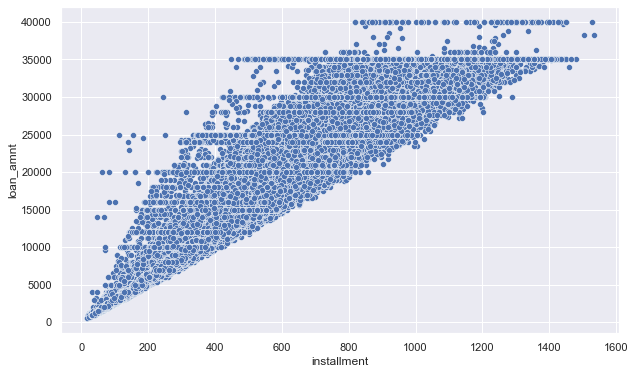

In [13]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'installment', y = 'loan_amnt', data = df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

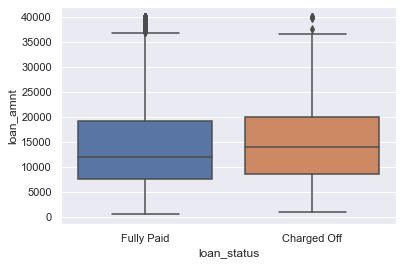

In [14]:
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)

In [15]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [16]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [17]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

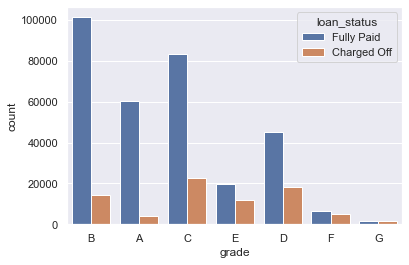

In [18]:
sns.countplot(x = 'grade', data = df, hue = 'loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

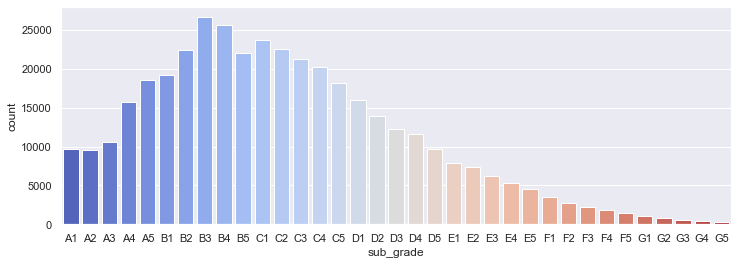

In [19]:
plt.figure(figsize = (12, 4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = df, order = subgrade_order, palette = 'coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

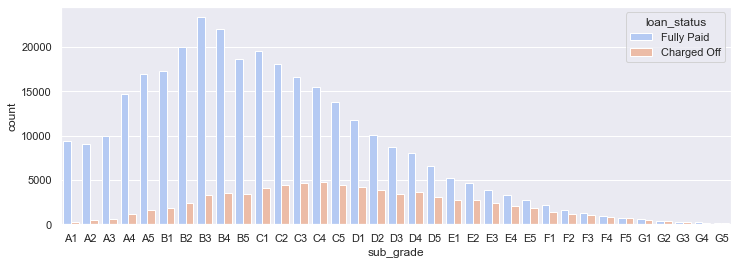

In [20]:
plt.figure(figsize = (12, 4))
sns.countplot(x = 'sub_grade', data = df, order = subgrade_order,
              hue = 'loan_status', palette = 'coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

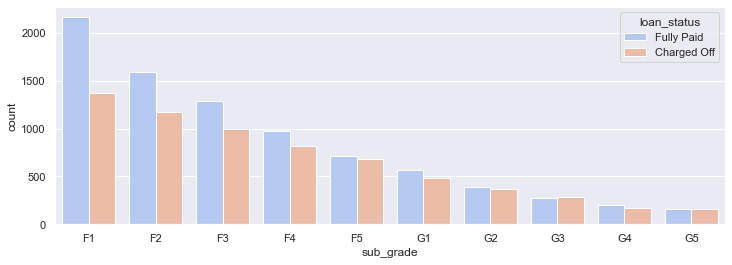

In [21]:
plt.figure(figsize = (12, 4))
df_FG = df[df['grade'].isin(['F', 'G'])]
subgrade_order = sorted(df_FG['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = df_FG,
                order = subgrade_order, hue = 'loan_status', palette = 'coolwarm')

In [22]:
df['loan_repaid'] = df['loan_status'].apply(lambda loan : 1 if loan == 'Fully Paid' else 0)

In [23]:
df[['loan_repaid', 'loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


<AxesSubplot:>

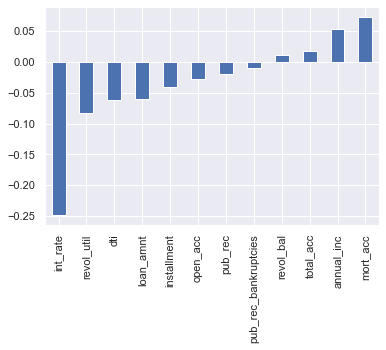

In [24]:
df.corr()['loan_repaid'][:-1].sort_values().plot(kind = 'bar')

# Section 2: Data PreProcessing

**Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [25]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

In [26]:
len(df)

396030

In [27]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [28]:
100 * (df.isnull().sum() / len(df))

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [29]:
# examine emp_title and emp_length to see whether it will be okay to drop them

feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [30]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [31]:
df['emp_title'].nunique()

173105

In [32]:
df['emp_title'].value_counts()

Teacher                              4389
Manager                              4250
Registered Nurse                     1856
RN                                   1846
Supervisor                           1830
                                     ... 
Spiro Moss LLP                          1
food service associate                  1
Senior Field Application Engineer       1
Asset Inventories, Inc.                 1
Contract officer                        1
Name: emp_title, Length: 173105, dtype: int64

In [33]:
# there are too many unique job titles to try to convert this
# to a dummy variable feature
df.drop(['emp_title'], axis = 1, inplace = True)

In [34]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [35]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

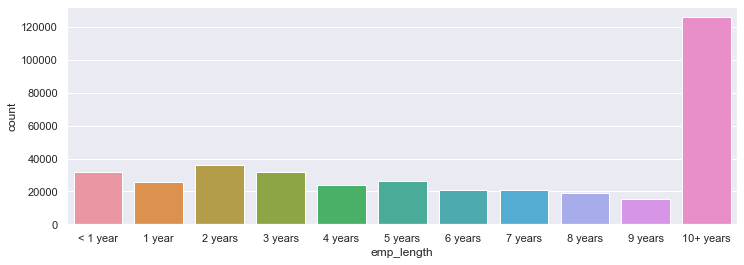

In [36]:
plt.figure(figsize = (12, 4))
sns.countplot(x = 'emp_length', data = df, order = emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

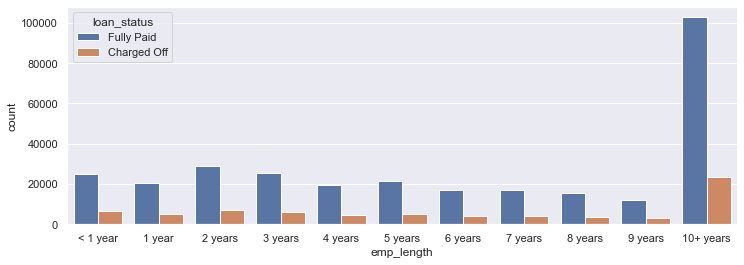

In [37]:
plt.figure(figsize = (12, 4))
sns.countplot(x = 'emp_length', data = df, order = emp_length_order, hue = 'loan_status')

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.**

In [38]:
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length')['loan_status'].count()

In [39]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length')['loan_status'].count()

In [40]:
emp_len = emp_co / (emp_co + emp_fp)

In [41]:
emp_len

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

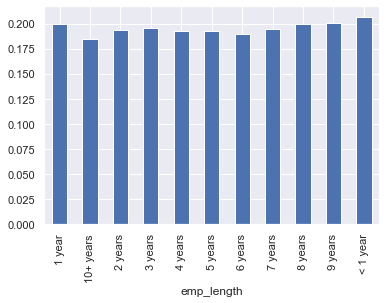

In [42]:
emp_len.plot(kind = 'bar')

In [43]:
# Charge off rates are extremely similar across all employment lengths
# therfore drop the emp_length column

In [44]:
df.drop(['emp_length'], axis = 1, inplace = True)

In [45]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [46]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [47]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [48]:
# title column is a description of the purpose column
# and therefore can be dropped

In [49]:
df.drop(['title'], axis = 1, inplace = True)

In [50]:
# mortage accounts

In [51]:
feat_info('mort_acc')

Number of mortgage accounts.


In [52]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

**Could just fill it in based on the mean of the other columns, or bin the columns into categories and then set NaN as its own category. There is no 100% correct approach.**

In [53]:
# correlation

print('Correlation with the mort_acc column')
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**total_acc feature correlates with the mort_acc therefore group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry**

In [54]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

In [55]:
def fill_mort_acc(total_acc, mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [56]:
df['mort_acc'] = df.apply(lambda x: 
                          fill_mort_acc(x['total_acc'], x['mort_acc']), axis = 1)

In [57]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Therefore we can remove the rows that are missing those values in those columns with dropna().**

In [58]:
df.dropna(inplace = True)

In [59]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

In [60]:
# Non-numerical columns

In [61]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

**Go through all the string features to see what we should do with them.**

### term feature

**Convert the term feature into either a 36 or 60 integer numeric data type**

In [62]:
df['term'] = df['term'].apply(lambda string : 36 if string[:3] == ' 36' else 60)

In [63]:
df['term'].unique()

array([36, 60])

### grade feature

**Grade is part of sub_grade, so drop the grade feature.**

In [64]:
df.drop(['grade'], axis = 1, inplace = True)

In [65]:
subgrade_dummies = pd.get_dummies(data = df['sub_grade'], drop_first = True)

In [66]:
df = pd.concat([df.drop('sub_grade', axis = 1), subgrade_dummies], axis = 1)

### verification_status, application_type,initial_list_status,purpose 
**Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe.**

In [67]:
dummies = pd.get_dummies(df[['verification_status', 'application_type',
                             'initial_list_status', 'purpose']], drop_first = True)

df.drop(['verification_status', 'application_type',
              'initial_list_status','purpose'], axis = 1, inplace = True)

df = pd.concat([df, dummies], axis = 1)

### home_ownership

In [68]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [69]:
df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace = True)

df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [70]:
dummies = pd.get_dummies(df['home_ownership'], drop_first = True)
df = pd.concat([df.drop('home_ownership', axis = 1), dummies], axis = 1)

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [71]:
df['zip_code'] = df['address'].apply(lambda address : address[-5:])

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [72]:
dummies = pd.get_dummies(df['zip_code'], drop_first = True)
df.drop(['zip_code', 'address'], axis = 1, inplace = True)
df = pd.concat([df, dummies], axis = 1)

### issue_d 

**NOTE: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [73]:
df.drop('issue_d', axis = 1, inplace = True)

### earliest_cr_line
**Historical time stamp feature. Extract the year from this feature, set this new data to a feature column, then drop the earliest_cr_line feature.**

In [74]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date : int(date[-4:]))
df = df.drop('earliest_cr_line', axis = 1)

In [75]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [76]:
df.drop('loan_status', axis = 1, inplace = True)

## Train Test Split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X = df.drop('loan_repaid', axis = 1).values
y = df['loan_repaid'].values

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                test_size = 0.2, random_state = 101)

## Normalizing the Data

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler = MinMaxScaler()

In [82]:
X_train = scaler.fit_transform(X_train)

In [83]:
X_test = scaler.transform(X_test)

# Creating the Model

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

**Build a sequential model that goes 78 --> 39 --> 19--> 1 output neuron. Explore adding [Dropout layers]**

In [85]:
model = Sequential()

# input layer
model.add(Dense(78,  activation = 'relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [86]:
model.fit(x = X_train,
          y = y_train, 
          epochs = 25,
          batch_size = 256,
          validation_data = (X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.3501 - val_loss: 0.2649
Epoch 2/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2665 - val_loss: 0.2629
Epoch 3/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2633 - val_loss: 0.2633
Epoch 4/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2623 - val_loss: 0.2623
Epoch 5/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2615 - val_loss: 0.2617
Epoch 6/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2604 - val_loss: 0.2619
Epoch 7/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2585 - val_loss: 0.2615
Epoch 8/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2611 - val_loss: 0.2618
Epoch 9/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2587 - val_loss: 0.2615
Epoch 10/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.258

In [94]:
from tensorflow.keras.models import load_model

In [95]:
model.save('jack_full_data_project_model.h5') 

# Section 3: Evaluating Model Performance.

In [96]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

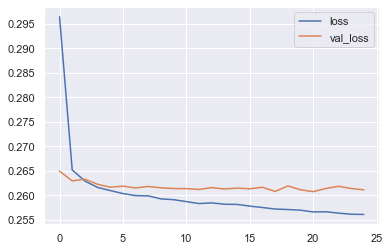

In [97]:
losses.plot()

In [102]:
predictions = np.where(model.predict(X_test) > 0.5, 1, 0)

In [103]:
from sklearn.metrics import classification_report, confusion_matrix

In [104]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.44      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [105]:
confusion_matrix(y_test,predictions)

array([[ 6822,  8836],
       [   82, 63304]])

**Given the customer below, would you offer this person a loan?**

In [106]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [113]:
model.predict(new_customer.values.reshape(1,78))

array([[1.]], dtype=float32)

**Did this person actually end up paying back their loan?**

In [114]:
df.iloc[random_ind]['loan_repaid']

1.0